In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('motorbike_ambulance_calls.csv')

Завдання 1

In [ ]:
statistics = dataset.describe()
print(statistics)

In [4]:
max_values = dataset.max()
print("\nMaximum values for each column:")
print(max_values)

min_values = dataset.min()
print("\nMinimum values for each column:")
print(min_values)

dataset_shape = dataset.shape
print("\nDimensionality of the dataset:", dataset_shape)


Maximum values for each column:
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

Minimum values for each column:
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

Dimensionality of the dataset: (17379, 15)


Завдання 2

In [5]:
types_check = dataset.dtypes
print("Data type:")
print(types_check)


counts_check = dataset.count()
print("\nData counts:")
print(counts_check)

Data types:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Data counts:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


Завдання 3

In [6]:
nulls = dataset.isnull().sum()
print("Missing values:")
print(nulls)

Missing values:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


1. Отримала базову статистичну інформацію про числові змінні та визначила їх максимальні та мінімальні значення, а також розмірність набору даних.

2. Типи даних більшості атрибутів - числові, що сприяє ефективному аналізу, адже моделі машинного навчання працюють краще з числовими значеннями.

3. У моїх  даних немає пропусків, що дозволяє використовувати всі атрибути без необхідності видаляти їх через пропущені значення.

Завдання 4

In [8]:
def transform_and_get_time_limits(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    first_date = df[date_col_name].min()
    last_date = df[date_col_name].max()
    print(f"The first date in the dataset: {first_date}.\nThe last date in the dataset: {last_date}")

transform_and_get_time_limits(dataset, 'date')

The first date in the dataset: 2011-01-01 00:00:00.
The last date in the dataset: 2012-12-31 00:00:00


я перетворила стовпець із датами у зручний формат. Це допомогло визначити найранішу та найпізнішу дати у наборі даних. Знання про часові межі даних може стати корисним для подальшого аналізу або роботи з цими даними.

Завдання 5

In [9]:
data_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_data = dataset[data_categorical]
print(categorical_data.head())
categorical_data.to_csv("categorical_data.csv", index=False)

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0  spring   0     1   0        0        6           0           1
1  spring   0     1   1        0        6           0           1
2  spring   0     1   2        0        6           0           1
3  spring   0     1   3        0        6           0           1
4  spring   0     1   4        0        6           0           1


Завданняя 6

In [11]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].replace(season_mapping)
    return df

data = encode_season(dataset, 'season')

Завдання 7

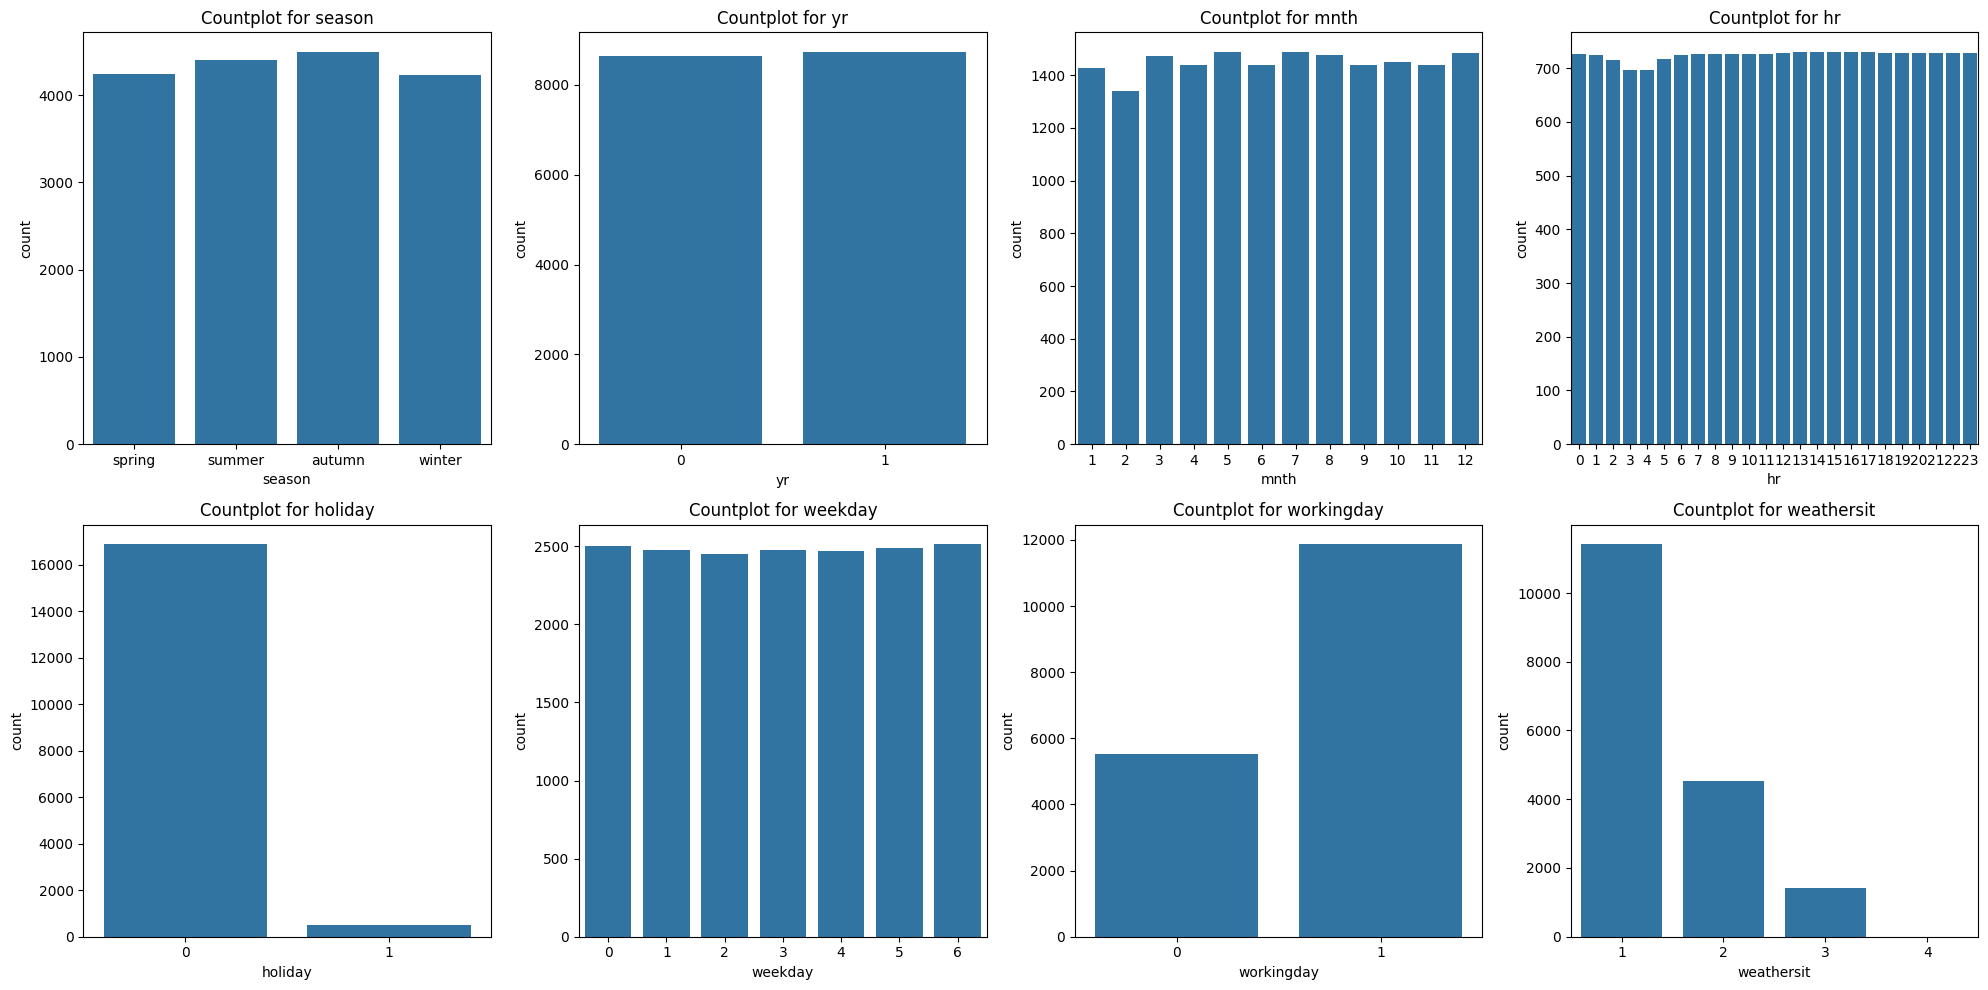

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(data=categorical_data, x=variable, ax=subplot)
    subplot.set_title(f'Countplot for {variable}')

plt.tight_layout()
plt.show()

1. Я  виконала розділення категоріальних змінних у відокремлений набір даних, щоб забезпечити зручність та уникнути втрати категоріальної інформації.

2. Також я перетворила змінну "Сезон" у числовий та категоріальний формат, що полегшить подальший аналіз, враховуючи її потенційну важливість.

3. Аналіз побудованих графіків показав рівномірний розподіл змін.

Завдання 8

In [17]:
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_numerical = data[numerical_vars]
print(data_numerical)
data_numerical.to_csv("data_numerical.csv", index=False)

       temp   atemp   hum  windspeed  cnt
0      0.24  0.2879  0.81     0.0000   16
1      0.22  0.2727  0.80     0.0000   40
2      0.22  0.2727  0.80     0.0000   32
3      0.24  0.2879  0.75     0.0000   13
4      0.24  0.2879  0.75     0.0000    1
...     ...     ...   ...        ...  ...
17374  0.26  0.2576  0.60     0.1642  119
17375  0.26  0.2576  0.60     0.1642   89
17376  0.26  0.2576  0.60     0.1642   90
17377  0.26  0.2727  0.56     0.1343   61
17378  0.26  0.2727  0.65     0.1343   49

[17379 rows x 5 columns]


завдання 9

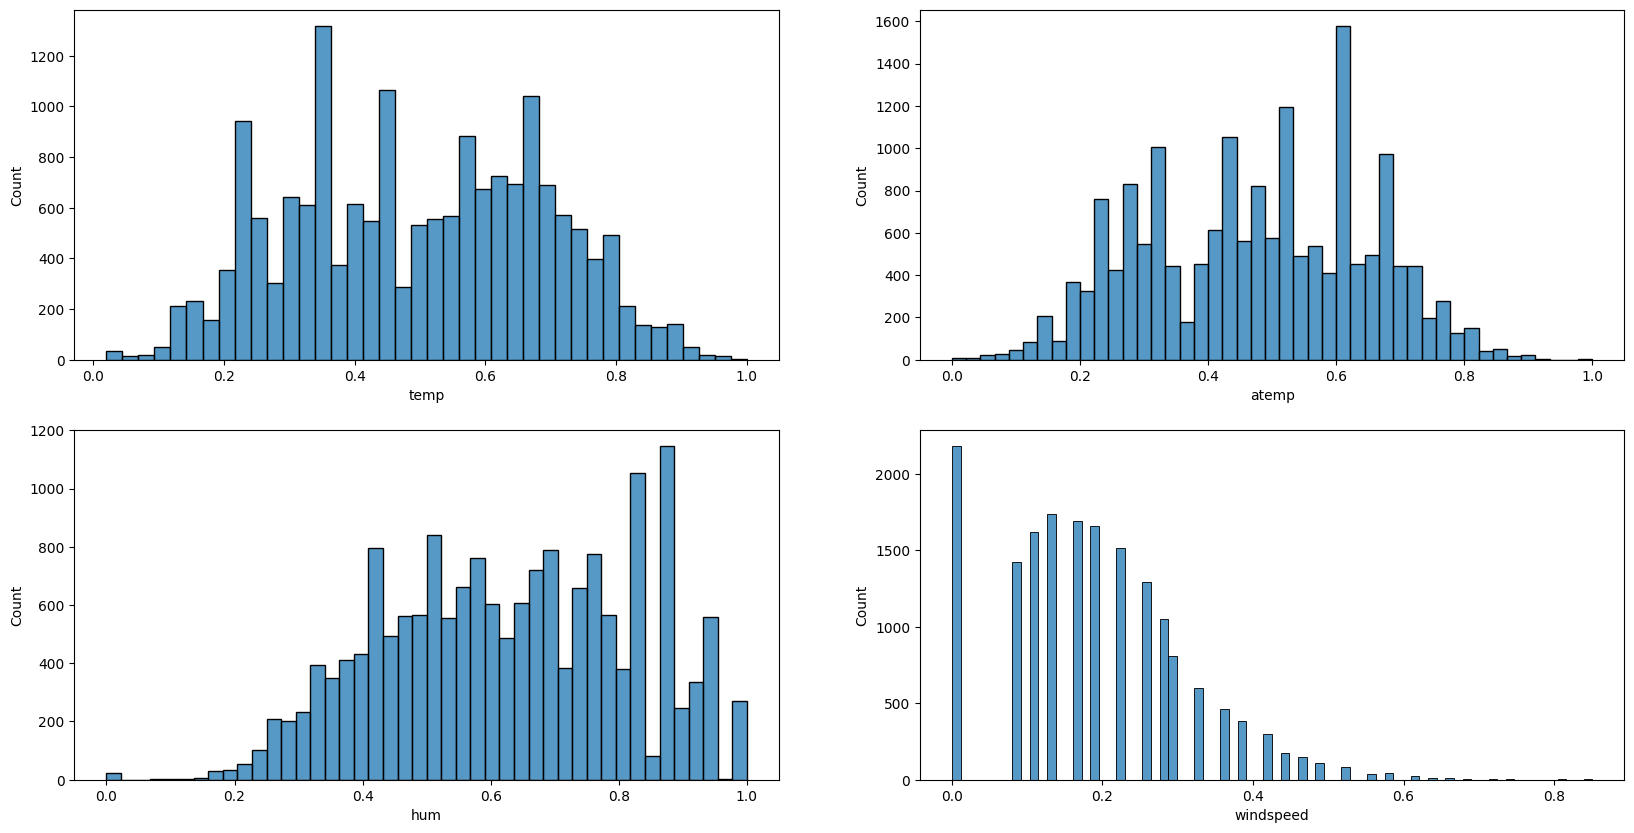

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, (variable, subplot) in enumerate(zip(data_numerical.columns, ax.flatten()), start=1):
    sns.histplot(x=variable, data=data, ax=subplot)

plt.show()

Завдання 10

Коефіцієнт нахилу: 1.2774116037490577


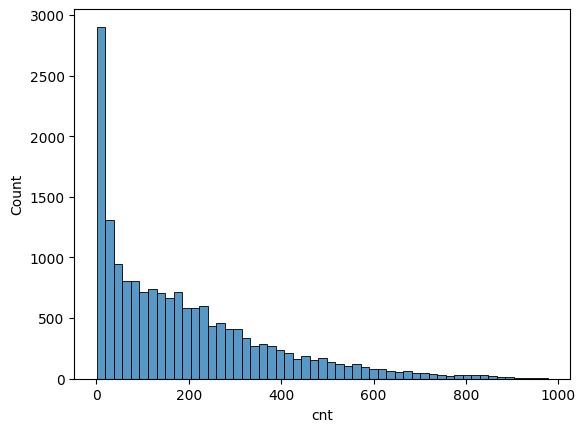

In [21]:
sns.histplot(data=data['cnt'])
coefficient_skew = data['cnt'].skew()
print("Коефіцієнт нахилу:", coefficient_skew)

1. Виділення виключно числової інформації з даного набору допомагає зосередитися на аналізі числових характеристик.
2. Експоненціальні та біноміальні розподіли дають уявлення про дані та дозволяють висувати гіпотези для подальшого аналізу.
3. Величина коефіцієнта нахилу (1,2774116037490577), що перевищує 0, показує, що більшість точок даних знаходиться зліва від середнього значення.

Завдання 11

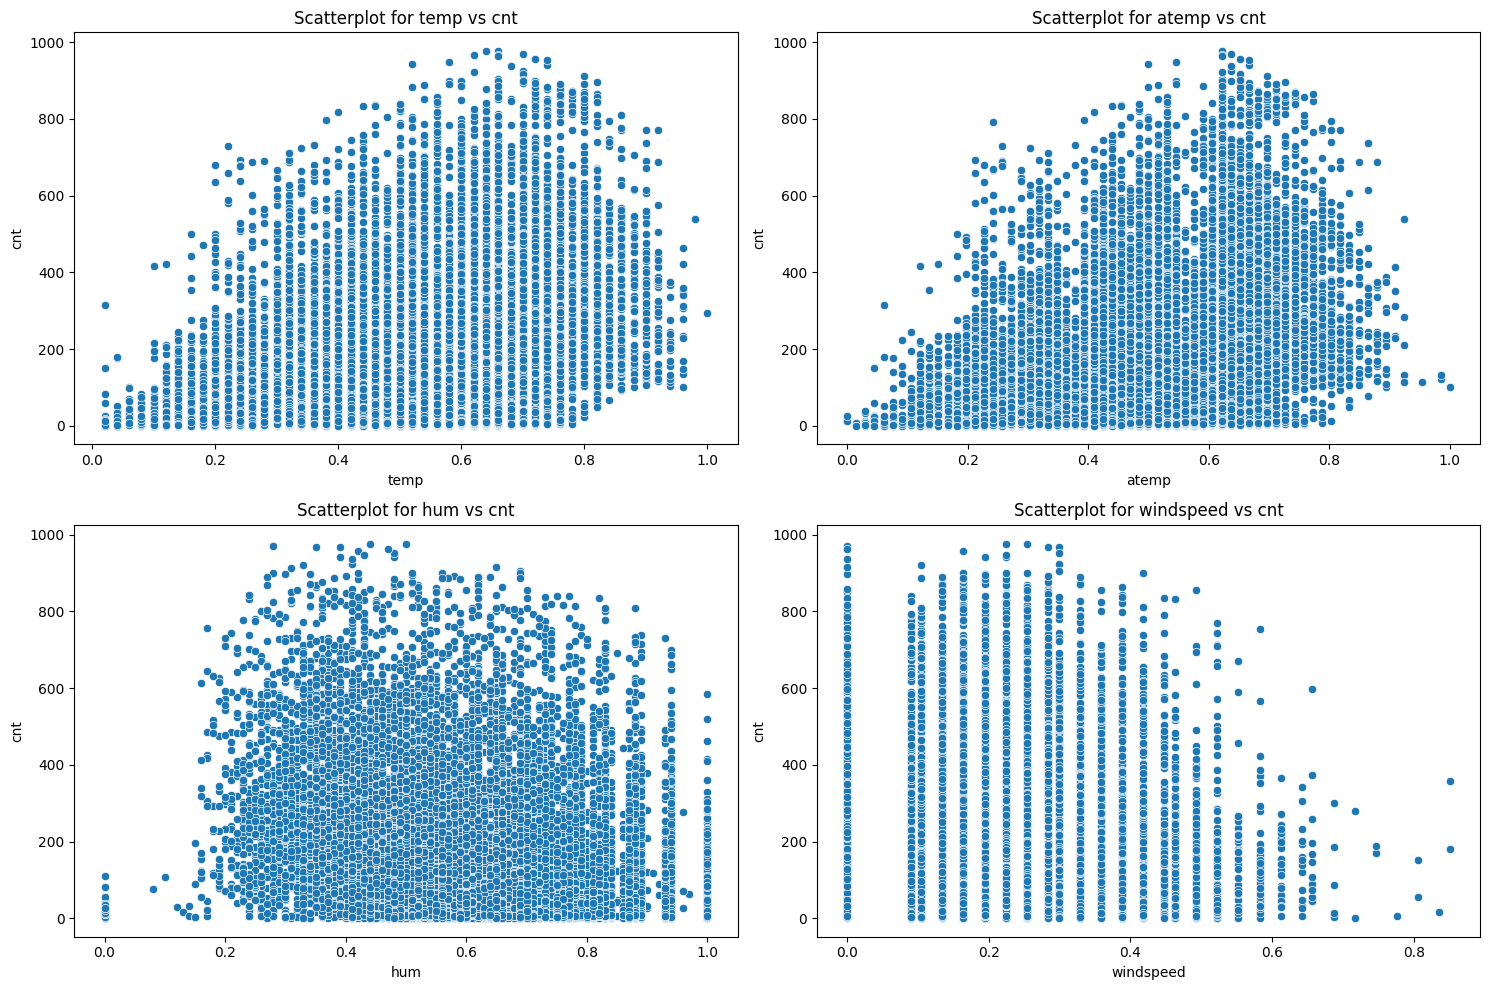

In [22]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(data=data, x=var, y='cnt', ax=subplot)
    subplot.set_title(f'Scatterplot for {var} vs cnt')

plt.tight_layout()
plt.show()

Завдання 12

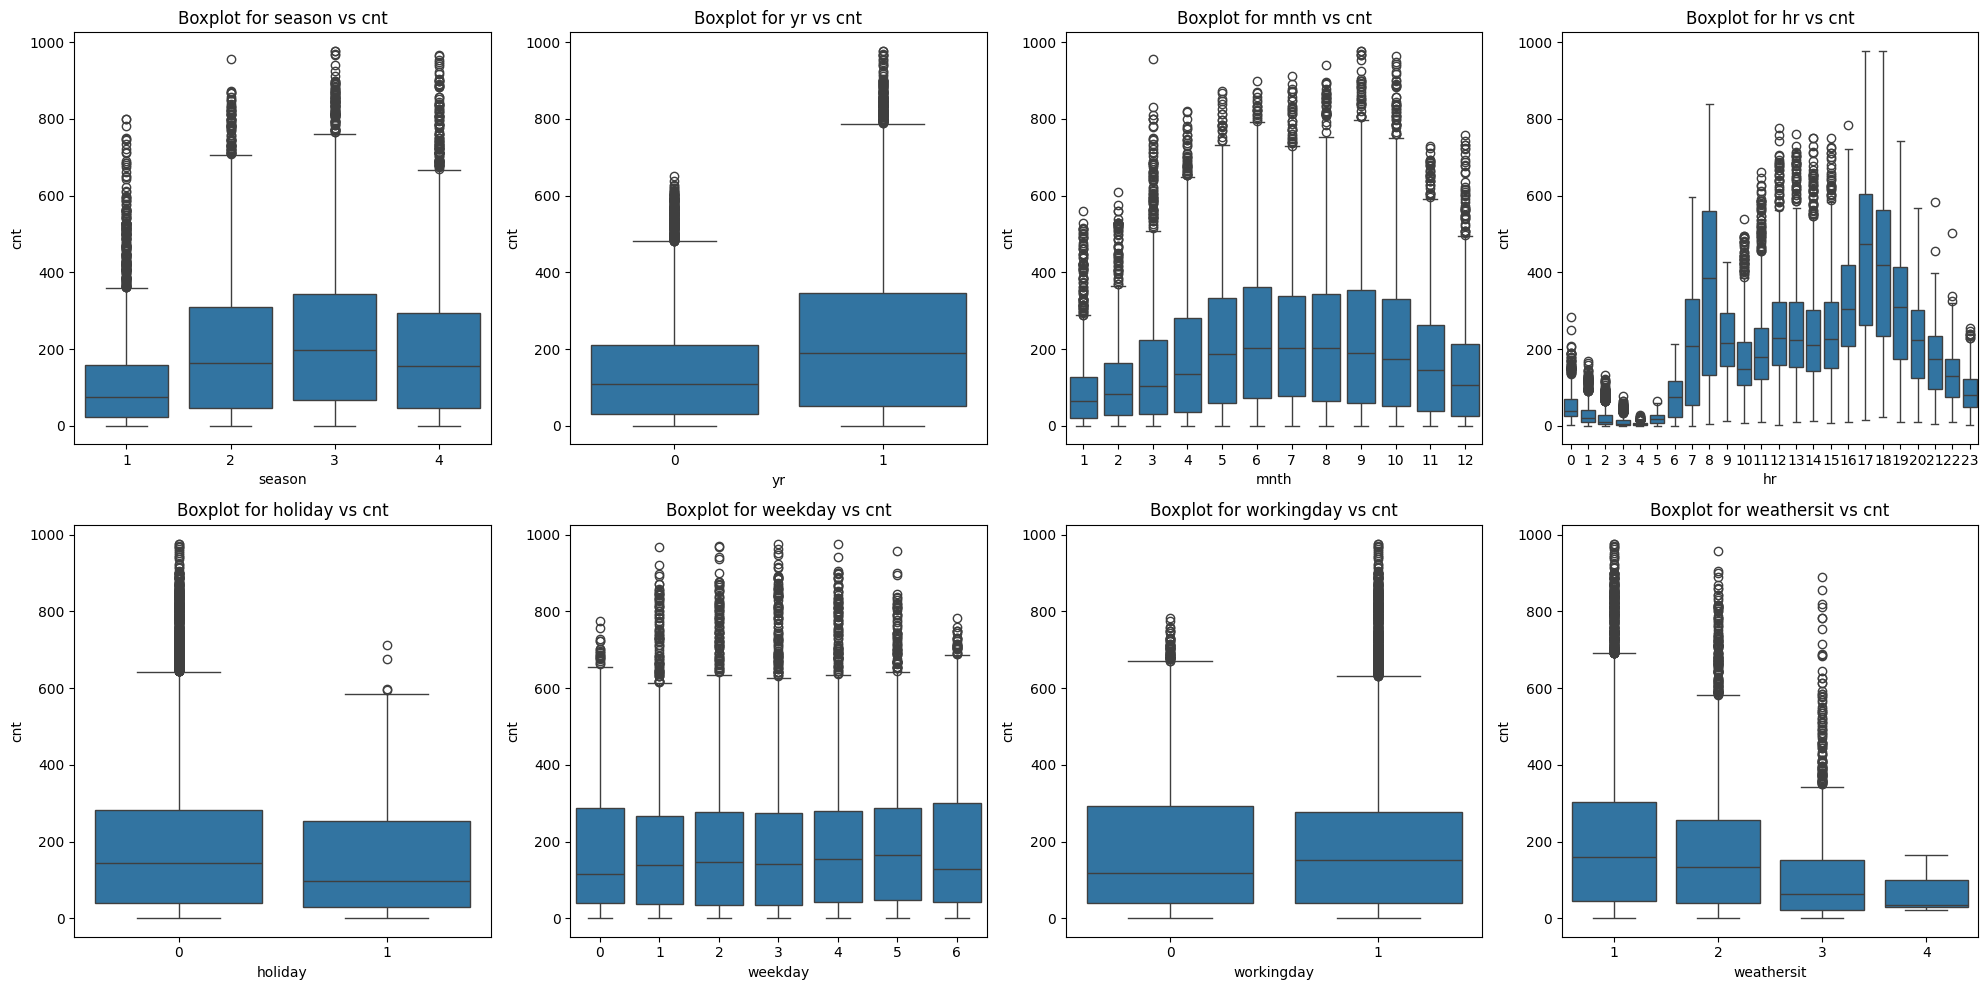

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(data=data, x=var, y='cnt', ax=subplot)
    subplot.set_title(f'Boxplot for {var} vs cnt')
plt.tight_layout()
plt.show()

Графік демонструє, що виклики, пов’язані з мотоциклами, зростають із підвищенням температури, оскільки більше людей їздять на мотоциклах у теплу пору року. Також спостерігається висока концентрація викликів у безвітряну погоду, на відміну від сильного вітру. Крім того, розподіл показує, що кількість викликів незначна між 0 і 5 ранку (коли люди зазвичай сплять). Пік викликів припадає на 8 ранку, коли люди вирушають на роботу/у справах.

Завдання 13

<ipython-input-25-f66248b78838>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = data.corr(method='pearson')


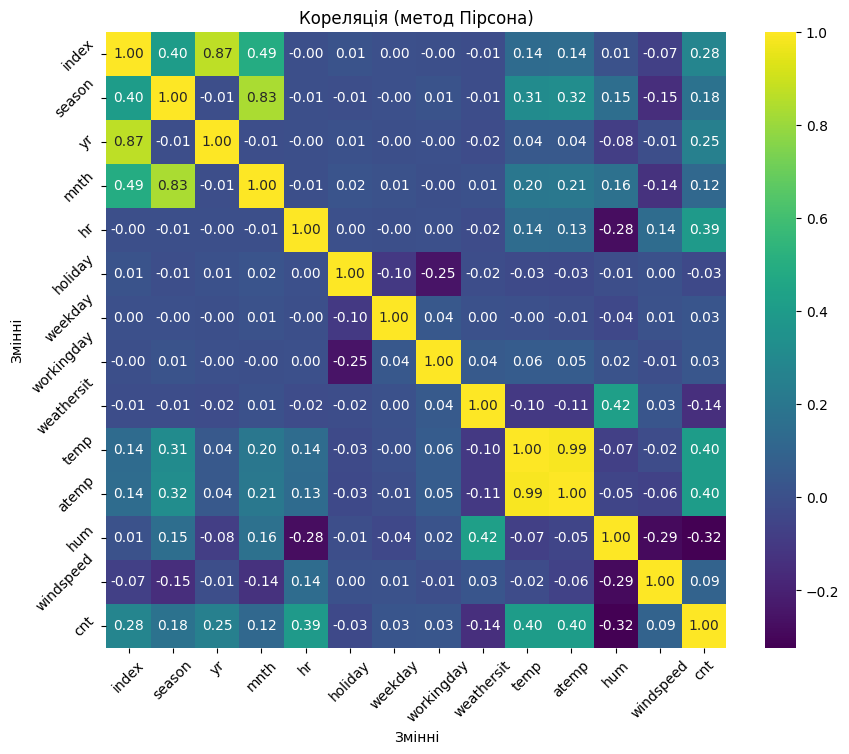

<ipython-input-25-f66248b78838>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = data.corr(method='spearman')


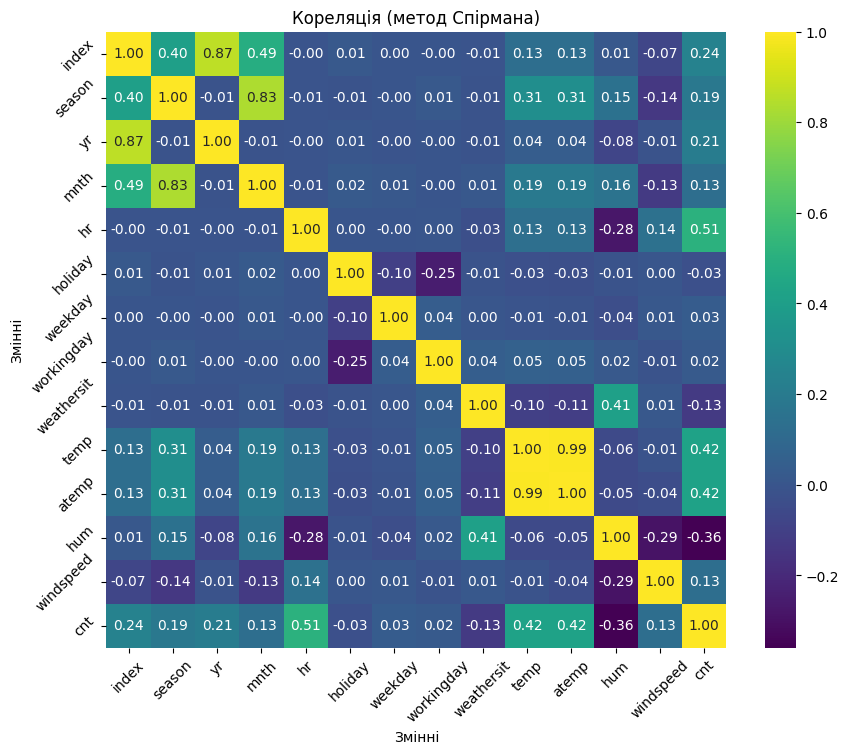

In [25]:
pearson_corr = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Кореляція (метод Пірсона)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel("Змінні")
plt.ylabel("Змінні")
plt.show()

spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Кореляція (метод Спірмана)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel("Змінні")
plt.ylabel("Змінні")
plt.show()

Коефіцієнт кореляції Пірсона визначає лінійну залежність між двома змінними, тоді як коефіцієнт кореляції Спірмена вказує на монотонну залежність між ними. Лінійні залежності можна описати прямою лінією, тоді як монотонні залежності можуть бути виражені прямою або непрямою лінією. На відміну від коефіцієнта Пірсона, коефіцієнт Спірмена не чутливий до екстремальних значень.